# Label positioning within regions :: Visual test

In [6]:
import matplotlib.pyplot as plt
from matplotlib_venn import _region
from tests.utils import point_in_patch
import warnings
warnings.simplefilter("error") # Have warnings raise exceptions in this test


def show_region(ax, r, c='r', xlim=(-0.5, 1.5), ylim=(-0.5, 1.5)):
    ax.set_aspect('equal')
    ax.set_xlim(*xlim)
    ax.set_ylim(*ylim)
    p = r.make_patch()
    if p is not None:
        p.set_color(c)
        p.set_ec('none')
        p.set_alpha(0.5)
        ax.add_patch(p)
    lblpos = r.label_position()
    ax.scatter(lblpos[0], lblpos[1])
    assert point_in_patch(p, lblpos)

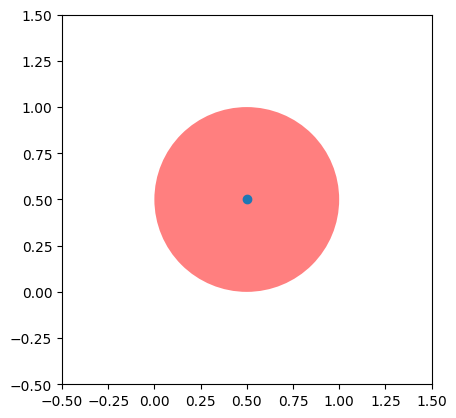

In [7]:
# For circles, the label is positioned in the center
vcr = _region.VennCircleRegion((0.5, 0.5), 0.5)

fig, ax = plt.subplots()
show_region(ax, vcr)

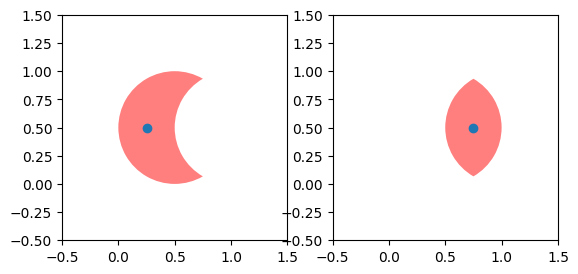

In [8]:
# For two-arc regions, the label is positioned in the middle between the two arcs
twoarc1, twoarc2 = vcr.subtract_and_intersect_circle((1.0, 0.5), 0.5)

fig, axs = plt.subplots(1, 2)
show_region(axs[0], twoarc1)
show_region(axs[1], twoarc2)

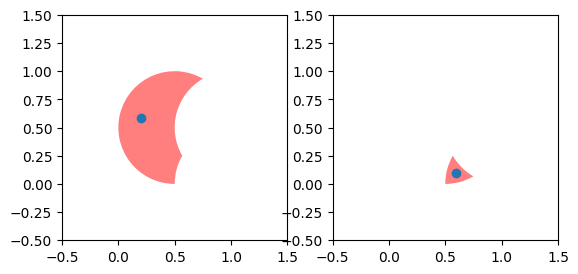

In [9]:
# For three-arc regions, the label is in the middle of the three arcs
threearc1, threearc2 = twoarc1.subtract_and_intersect_circle((1, 0), 0.5)

fig, axs = plt.subplots(1, 2)
show_region(axs[0], threearc1)
show_region(axs[1], threearc2)

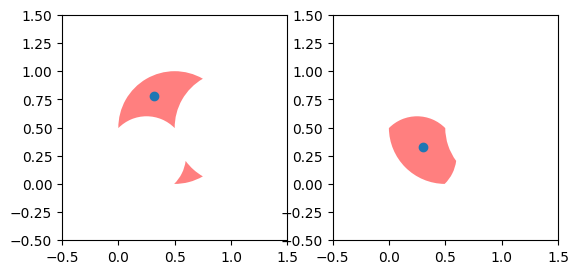

In [10]:
# For multi-piece regions, the label will be positioned in the largest piece
# For four-arcs, the mean of four edges is simply used
multipiece, fourarc = twoarc1.subtract_and_intersect_circle((0.25, 0.25), 0.35)

fig, axs = plt.subplots(1, 2)
show_region(axs[0], multipiece)
show_region(axs[1], fourarc)

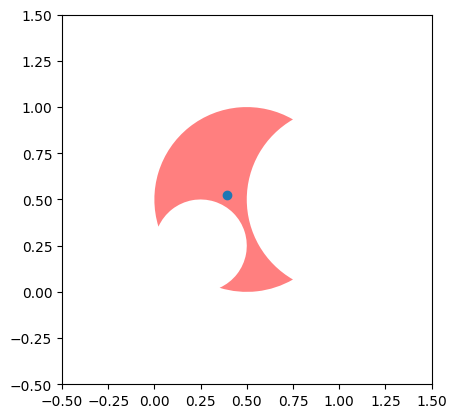

In [11]:
# An example of bad label positioning
bad_piece, _ = twoarc1.subtract_and_intersect_circle((0.25, 0.25), 0.25)
fig, ax = plt.subplots()
show_region(ax, bad_piece); 